# Convolution using a real-world example 

## Section 1: 1D Convolution

#### Record a few seconds of audio:

In [42]:
import sounddevice as sd
from scipy.io.wavfile import write

# Parameters
duration = 1  # seconds
sample_rate = 44100  # standard CD-quality

print("Recording... 🎙️")
data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()  # Wait until recording is finished
print("Done recording ✅")

# Save to a WAV file
write("my_recording.wav", sample_rate, data)


Recording... 🎙️
Done recording ✅


In [43]:
data.shape

(44100, 1)

### Load the WAV file:

In [44]:
import scipy.io.wavfile
# Read the file
sr, data = scipy.io.wavfile.read("my_recording.wav")
print(f"Sample Rate: {sr}, Shape: {data.shape}, Dtype: {data.dtype}")


Sample Rate: 44100, Shape: (44100,), Dtype: float32


### Play the original waveform

In [45]:
# Optionally play it
from IPython.display import Audio
Audio(data,rate=sample_rate)

### Plot the original waveform

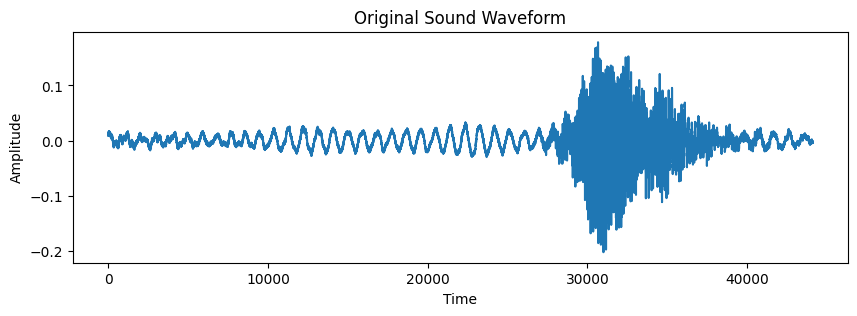

In [46]:
import matplotlib.pyplot as plt
# Plot original waveform
plt.figure(figsize=(10, 3))
plt.plot(data)
plt.title("Original Sound Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Convert it to torch 

In [48]:
import torch
import torch.nn as nn
waveform = torch.tensor(data).unsqueeze(0).unsqueeze(0)  # (1, 1, N)
waveform.shape

torch.Size([1, 1, 44100])

### Define a simple Conv1d layer:

In [52]:
# Simulate a 1D conv: input must be (batch, channels, samples)
conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=45, stride=2, padding=7)

# Apply Conv1d
filtered = conv(waveform)

# Remove batch dimension
filtered_waveform = filtered.squeeze().detach().numpy()

print(f"Filtered shape: {filtered.shape}")


Filtered shape: torch.Size([1, 1, 22035])


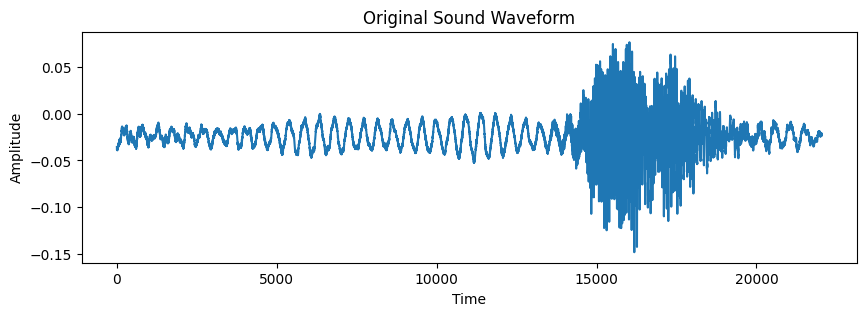

In [53]:
import matplotlib.pyplot as plt
# Plot original waveform
plt.figure(figsize=(10, 3))
plt.plot(filtered_waveform)
plt.title("Original Sound Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Listen to the result:

In [54]:
# Listen using IPython
from IPython.display import Audio
Audio(filtered_waveform, rate=sample_rate)


## Section 1: 2D Convolution

In [56]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

### Load and Display an RGB Image:

In [ ]:
# Load the image
image = Image.open("your_image.jpg")  # Replace with your filename

# Show original image
plt.imshow(image)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()


Exception ignored in: <function Wave_write.__del__ at 0x000001D0FA2599E0>
Traceback (most recent call last):
  File "c:\Users\Haghbin\AppData\Local\Programs\Python\Python312\Lib\wave.py", line 465, in __del__
    self.close()
  File "c:\Users\Haghbin\AppData\Local\Programs\Python\Python312\Lib\wave.py", line 583, in close
    self._ensure_header_written(0)
  File "c:\Users\Haghbin\AppData\Local\Programs\Python\Python312\Lib\wave.py", line 606, in _ensure_header_written
    self._write_header(datasize)
  File "c:\Users\Haghbin\AppData\Local\Programs\Python\Python312\Lib\wave.py", line 610, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.


AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

### Convert to Grayscale and Visualize

In [ ]:
gray_transform = transforms.Compose([
    transforms.Grayscale(),          # Convert to grayscale
    transforms.ToTensor(),          # Convert to torch tensor (C × H × W)
])

gray_image_tensor = gray_transform(image)  # Shape: [1, H, W]

# Show grayscale image
plt.imshow(gray_image_tensor.squeeze(0), cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


### Define a Simple Conv2D Filter:

In [ ]:
# Make input shape [1, 1, H, W] → (batch, channel, height, width)
input_tensor = gray_image_tensor.unsqueeze(0)

# Define Conv2D layer manually
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

# Edge detection kernel (Sobel-like)
kernel = torch.tensor([[[-1.0, -1.0, -1.0],
                        [ 0.0,  0.0,  0.0],
                        [ 1.0,  1.0,  1.0]]])  # shape: [1, 3, 3]

# Set kernel weights
conv.weight.data = kernel.unsqueeze(0)  # shape: [1, 1, 3, 3]


### Apply Conv2D and Show the Output

In [ ]:
output = conv(input_tensor)

# Visualize the result
plt.imshow(output.squeeze(0).squeeze(0).detach(), cmap='gray')
plt.title("After Conv2D (Edge Detection)")
plt.axis('off')
plt.show()
